# **AI Society Week 6. Classification**

## Jupyter Notebooks and Python
For workshops, we typically use **Google Colab**, a service that allows you to run python code in a nice containerized environment. It even provides free GPU/TPU runtimes!
___

In Google Colab, you write code using **Jupyter notebooks**. Notebooks are comprised of text and code cells, which can be run by hitting `Shift + Enter`. For your convenience, here are a few more nifty keyboard shortcuts:

* `b`: New cell below
* `a`: New cell above


## Hardware Needed:
Any computer with access to the internet and web browser

* 👉🏻Link to Dataset:
https://drive.google.com/file/d/1hyklg8Kz0buC84lWa25KB73tH1eupXA7/view?usp=sharing
* 👉🏻Link to Dataset (tfidf):
https://drive.google.com/file/d/1hu_9K2P0ssfiXpKYGlr5GTQg9SsGj8Qe/view?usp=sharing

# Importing the necesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Datatset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI Society Fall23/Week 4/data_week4.csv')

In [ ]:
data

,Event Name,Description,Theme
0,Valentine's Paint Night!,descriptioncome take break homework paint also...,Art & Music
1,Valentine's Day Decorating,descriptionstudents decorate hall door dorm va...,Art & Music
2,Valentine Decorating with CA Taylor,descriptionjoin ca taylor decorate valentines ...,Art & Music
3,BWL's Annual Galentine Event!,descriptionhi barrett womens league bwl annual...,Art & Music
4,Writer's Guild General Meeting,descriptioncome join us workshop writing socia...,Art & Music
...,...,...,...
1408,Church and Lunch with Christian Challenge,descriptionwe pick church lunch right service,Spiritual
1409,Bibles & Coffee - The Well @ ASU,descriptionjoin us hassayampa bike racks enjoy...,Spiritual
1410,ASU United Worship Gathering,descriptioncome together campus ministries ari...,Spiritual
1411,Challenge,descriptionjoin us night community spiritual c...,Spiritual


In [ ]:
data_tfidf = pd.read_csv('/content/drive/MyDrive/AI Society Fall23/Week 4/tfidf_week4.csv')

In [ ]:
data_tfidf

,aaberg,aamc,aapasc,aapi,abandoning,abba,abbasov,abby,abcdorschcom,abels,...,zinefest,zinemaking,zines,ziploc,zippers,zokaites,zone,zoo,zoom,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KMeans Clustering

**How does K-Means work?**

"K-Means works by first selecting K random points in your dataset as initial cluster centers. <br>
Then, it repeatedly:
* Assigns each data point to the nearest cluster center.<br>
* Recalculates the centers by averaging the points in each cluster.<br>
This process continues until the centers stop moving."

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_tfidf)
    sse.append(kmeans.inertia_)

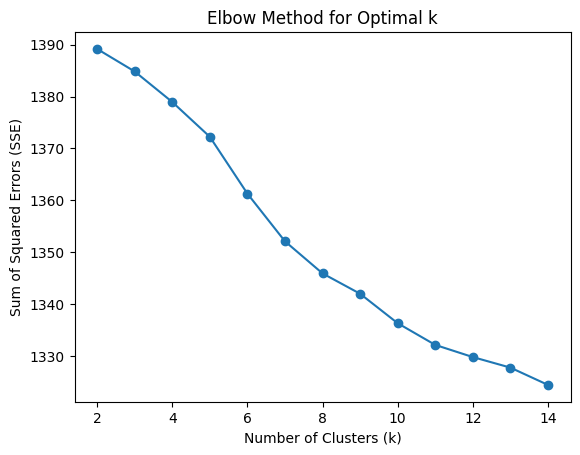

In [ ]:
# Plot the SSE curve
plt.plot(range(2, 15), sse, marker = 'o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
# Find the optimal k using the silhouette score
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_tfidf)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_tfidf, labels)
    silhouette_scores.append(silhouette_avg)

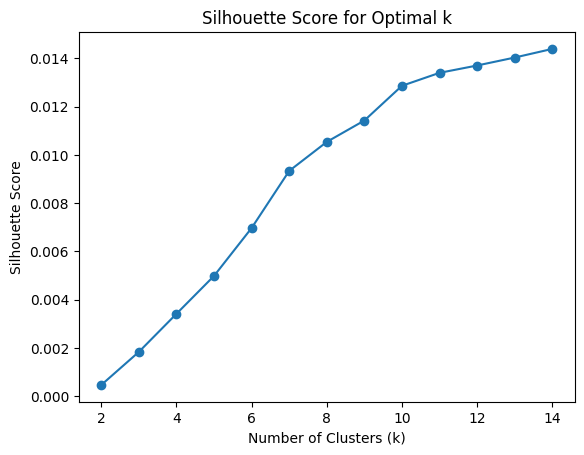

In [ ]:
# Plot the silhouette score curve
plt.plot(range(2, 15), silhouette_scores, marker = 'o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

* Determine the optimal k based on the elbow method and silhouette score
* Look for the "elbow" point in the SSE curve and the highest silhouette score
* This will give you an indication of the optimal number of clusters

In [ ]:
data.Theme.value_counts()

,count
Theme,
Art & Music,368
Athletic,329
Group Business,193
Social,175
Fundraising,162
Learning,107
Cultural,33
Service,28
Spiritual,18


In [ ]:
 # Final cluster KMeans model with k = 9.
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_tfidf)
labels = kmeans.labels_

In [ ]:
data['cluster'] = labels

In [ ]:
data

,Event Name,Description,Theme,cluster
0,Valentine's Paint Night!,descriptioncome take break homework paint also...,Art & Music,4
1,Valentine's Day Decorating,descriptionstudents decorate hall door dorm va...,Art & Music,0
2,Valentine Decorating with CA Taylor,descriptionjoin ca taylor decorate valentines ...,Art & Music,4
3,BWL's Annual Galentine Event!,descriptionhi barrett womens league bwl annual...,Art & Music,8
4,Writer's Guild General Meeting,descriptioncome join us workshop writing socia...,Art & Music,7
...,...,...,...,...
1408,Church and Lunch with Christian Challenge,descriptionwe pick church lunch right service,Spiritual,4
1409,Bibles & Coffee - The Well @ ASU,descriptionjoin us hassayampa bike racks enjoy...,Spiritual,7
1410,ASU United Worship Gathering,descriptioncome together campus ministries ari...,Spiritual,7
1411,Challenge,descriptionjoin us night community spiritual c...,Spiritual,1


In [ ]:
data.groupby('cluster').Theme.value_counts()

cluster  Theme         
0        Social             20
         Art & Music        10
         Athletic            8
         Group Business      5
         Fundraising         4
         Learning            3
         Spiritual           1
1        Fundraising        48
         Art & Music        32
         Athletic           23
         Social             22
         Group Business     15
         Cultural            7
         Learning            7
         Service             3
         Spiritual           1
2        Athletic           67
3        Group Business     43
         Art & Music        33
         Athletic           18
         Learning           15
         Social             14
         Cultural            3
         Fundraising         1
4        Art & Music       103
         Fundraising        69
         Social             55
         Group Business     53
         Athletic           48
         Learning           22
         Service            16
         Cultural            8
         Spiritual           8
5        Athletic           55
         Social             10
         Art & Music         8
         Fundraising         2
         Learning            2
         Group Business      1
         Service             1
6        Athletic           22
7        Art & Music       153
         Group Business     64
         Learning           58
         Social             42
         Athletic           35
         Cultural           15
         Fundraising        15
         Service             8
         Spiritual           6
8        Athletic           53
         Art & Music        29
         Fundraising        23
         Group Business     12
         Social             12
         Spiritual           2
Name: count, dtype: int64

In [ ]:
print(data[data.cluster == 0]['Event Name'])

1                              Valentine's Day Decorating
25                                        Open Mic Night!
98                               Lux Vol.18 Release Party
119                                    Monday Movie Night
130                                Sketchbooks and Coffee
185                                    Lofi Study Session
196               De-Stress for Finals - Post Card Making
291                                          Who Are You?
308                    Amazon Labor Union Benefit Concert
342                                  AIGA at First Friday
371                                  AIGA at First Friday
385                             Hot Chocolate and Conchas
408                            Geoclub April Mineral Sale
483                                   Cereus 4 Game Night
488                                   Breakfast on the Go
501        What's Scarier Than Finals? Horror Movie Night
511                         Build a Kit: Finals Self Care
512           

-----------------------

## PCA (Principal component analysis)


* Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models
* Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.
* The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.

In [ ]:
data_tfidf.shape

(1413, 7497)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data before applying PCA
x = StandardScaler().fit_transform(data_tfidf)

# Apply PCA with a desired number of components
pca = PCA(n_components=1000)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)


In [ ]:
# Analyze explained variance ratio to determine the optimal number of features
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

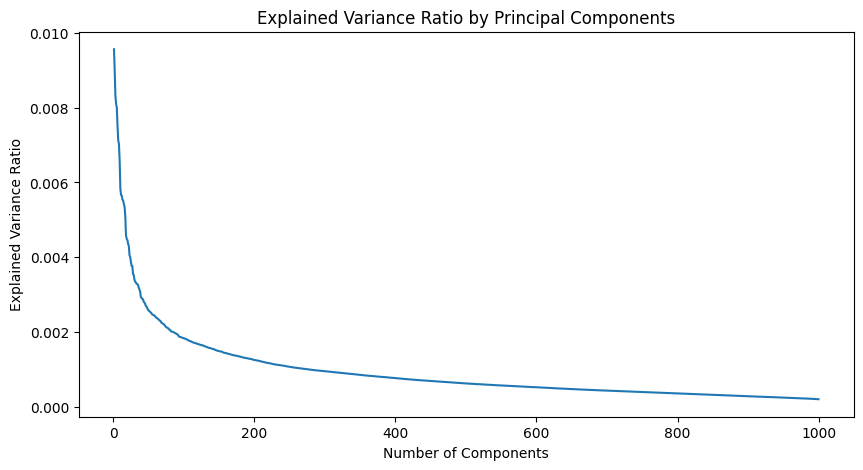

In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

*Explained variance* in Principal Component Analysis (PCA) refers to how much of the data's total variance is captured by each principal component (PC). In simpler terms, it's a measure of how much information (or variability) from the original dataset is retained by each principal component.

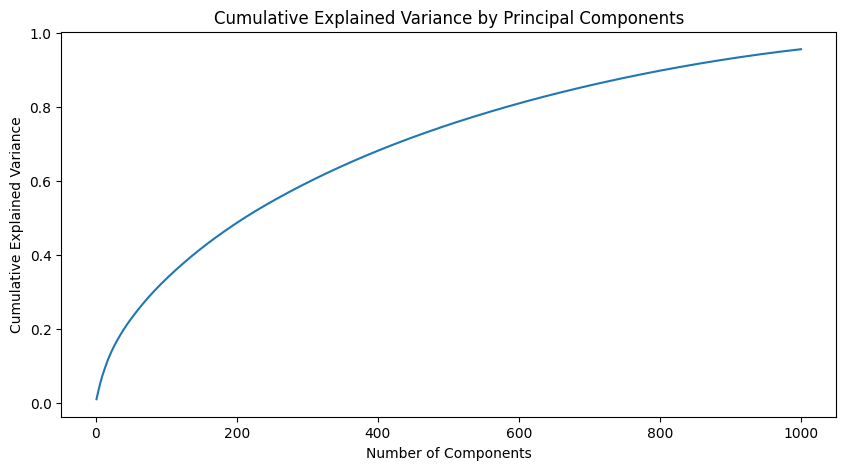

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

The goal of the *cumulative variance* plot is to help you decide how many principal components (PCs) are sufficient to retain most of the important information in your data while discarding noise or less important features.

In [ ]:
# Determine the optimal number of components to retain
# You can choose the number of components that explain a certain percentage of variance (e.g., 95%)
n_components_to_retain = np.argmax(cumulative_variance >= 0.95) + 1  # Example: retain components explaining 95% variance
print(f"Optimal number of components to retain: {n_components_to_retain}")

Optimal number of components to retain: 979


In [ ]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components_to_retain)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape

(1413, 979)

In [ ]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,-0.119004,0.041662,-0.218971,-0.350464,-0.383774,-0.387184,-0.318015,-0.221019,-0.339309,-0.356892,...,0.988329,-0.061394,-1.039556,0.104269,-1.015798,-0.000392,0.259967,0.030449,0.528348,0.671942
1,-0.367136,-0.235055,-0.166148,-0.357370,-0.354408,-0.377907,-0.304032,-0.317028,-0.295426,-0.333370,...,-2.541835,-6.555199,3.498450,-1.978374,-2.134569,-0.625437,1.843293,2.412363,3.059912,2.191963
2,-0.374182,-0.226898,-0.209033,-0.309527,-0.345724,-0.357427,-0.231465,-0.283823,-0.195881,-0.352512,...,-2.514572,1.861430,-1.906289,-0.445692,2.705884,0.454373,2.115034,0.566855,-2.355566,0.079409
3,-0.244304,0.270288,-0.266124,-0.378415,-0.437670,-0.435141,-0.334770,-0.378281,-0.329288,-0.433919,...,-0.202330,0.048391,-0.459191,0.362214,-0.139070,0.064719,0.499295,-0.117271,0.700761,0.131989
4,-0.369541,-0.236656,-0.206729,-0.344412,-0.332252,-0.296332,-0.303321,-0.292726,-0.256092,-0.342354,...,0.200431,1.414286,0.609999,0.511654,-2.544745,1.478208,-0.562695,-0.388542,-0.557452,0.104423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,-0.265361,-0.240786,-0.202720,-0.299671,-0.354318,-0.355462,-0.231092,-0.324634,-0.291593,-0.343839,...,-0.372704,-0.472112,3.726055,-2.599377,-2.204601,0.517912,0.111174,-1.202993,-0.311174,1.817436
1409,-0.299026,-0.264158,-0.197262,-0.324388,-0.358035,-0.352804,-0.308518,-0.354824,-0.311279,-0.383628,...,0.074591,0.229054,0.124310,-0.181764,-0.338163,-0.040375,0.178367,-0.228072,-0.110577,0.021068
1410,-0.329883,-0.171691,-0.229455,-0.382293,-0.344772,-0.343491,-0.288821,-0.156373,-0.079946,-0.069625,...,-0.128128,-0.068424,-0.337668,-0.112799,-0.019310,-0.268814,0.194645,-0.184647,0.019569,-0.071554
1411,-0.170003,-0.286320,-0.229513,-0.346799,-0.313846,-0.137367,-0.302166,-0.336088,-0.308044,-0.312993,...,-0.208997,0.419283,0.717743,-0.882266,-2.622996,-0.560648,-2.250364,3.440472,0.003962,-1.819794


## SVM on new dataset

In [ ]:
# Separate features (X) and target (y)
X = principalDf
y = data['Theme']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

## Train Test Feature Split

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Loading the Models

In [ ]:
# Create and train the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.519434628975265


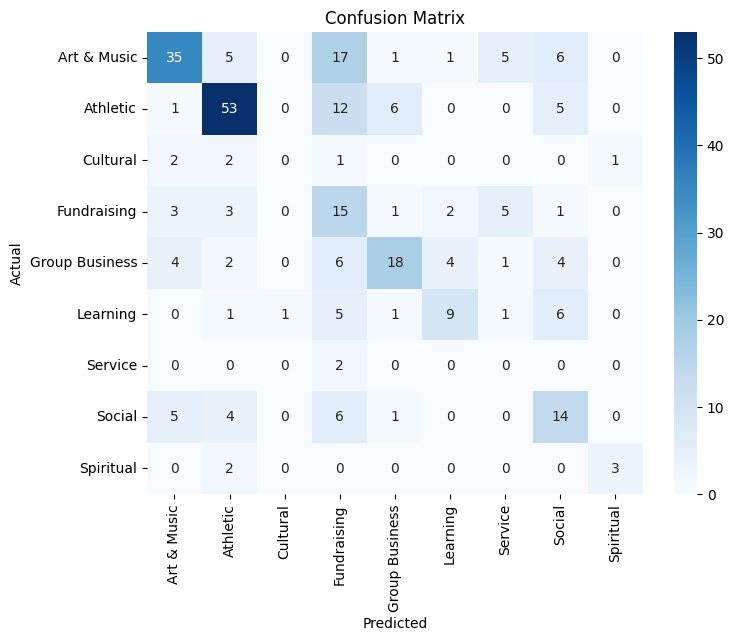

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

__________

Thanks for attending the workshop.
We will continue in next workshop.